In [32]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
INALT_119 = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/MLD/1_INALT20.L46-KFS119_1d_20090101_20091231_MLD_iMirabilis.nc')
INALT_104 = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS104/1_INALT20.L46-KFS104_1d_20090101_20091231_grid_T_iMirabilis.nc')
INALT_106 = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS106/1_INALT20.L46-KFS106_1h_20100101_20101231_grid_T_Walvis_Ridge.nc')

In [29]:
INALT_119_Ewing = INALT_119.isel(x=slice(163,171),y=slice(293,299)).mean(dim=['x', 'y', 'axis_nbounds']).to_pandas().set_index('time_centered')

In [34]:
new_index = pd.date_range(start='2009-01-01', periods=len(INALT_119_Ewing), freq='D')
INALT_119_Ewing.index = new_index

In [35]:
INALT_119_Ewing

,somxl010,sobowlin,somixhgt
2009-01-01,12.839149,12.839149,12.839149
2009-01-02,12.839149,12.839149,12.839149
2009-01-03,12.839149,12.839149,12.839149
2009-01-04,12.839149,12.839149,12.883453
2009-01-05,12.839149,12.839149,14.784877
...,...,...,...
2009-12-27,16.795235,20.044540,27.731943
2009-12-28,17.319586,20.044540,27.946291
2009-12-29,18.384611,26.464712,27.946291
2009-12-30,19.098549,27.946291,27.946291


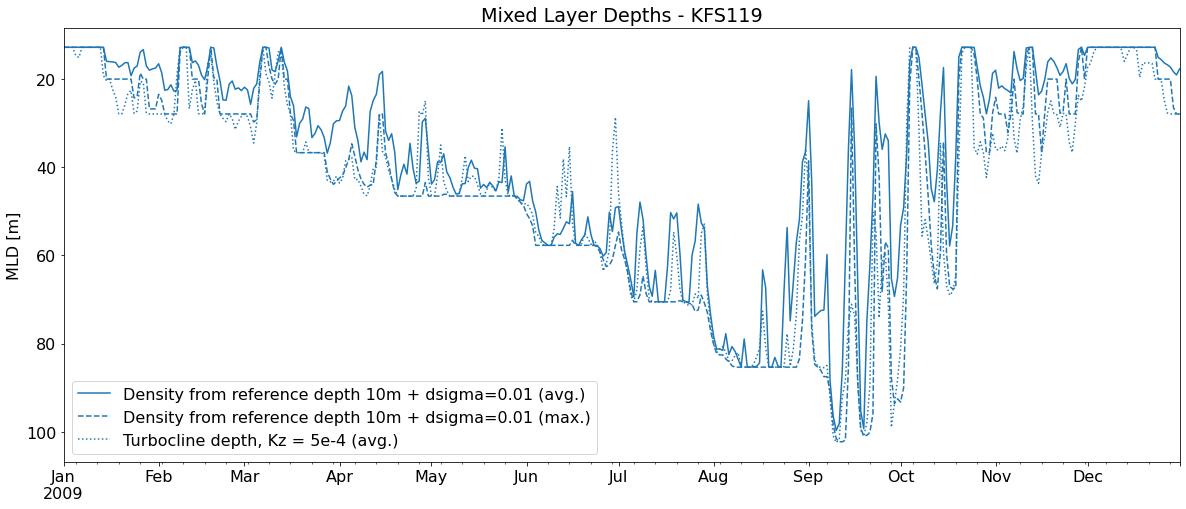

In [38]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(20,8))
plt.title('Mixed Layer Depths - KFS119')
INALT_119_Ewing['somxl010'].plot(color='tab:blue',label='Density from reference depth 10m + dsigma=0.01 (avg.)')
INALT_119_Ewing['sobowlin'].plot(color='tab:blue',linestyle='--',label='Density from reference depth 10m + dsigma=0.01 (max.)')
INALT_119_Ewing['somixhgt'].plot(color='tab:blue',linestyle='dotted',label='Turbocline depth, Kz = 5e-4 (avg.)')
plt.ylabel('MLD [m]')
plt.legend()
plt.gca().invert_yaxis();

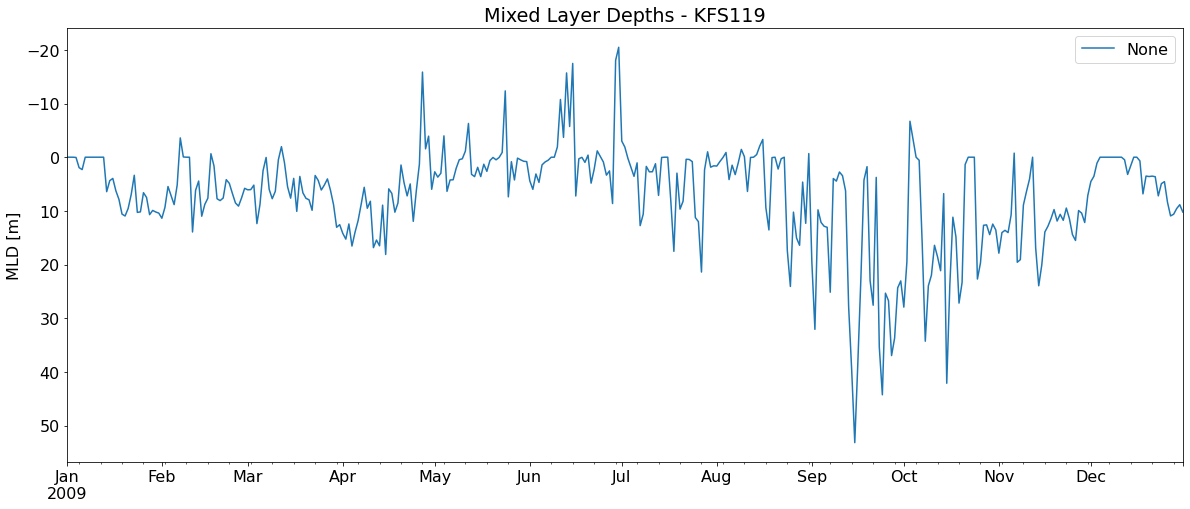

In [40]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(20,8))
plt.title('Mixed Layer Depths - KFS119')
(INALT_119_Ewing['somixhgt']-INALT_119_Ewing['somxl010']).plot(color='tab:blue')#,label='Density from reference depth 10m + dsigma=0.01 (avg.)')
#INALT_119_Ewing['sobowlin'].plot(color='tab:blue',linestyle='--',label='Density from reference depth 10m + dsigma=0.01 (max.)')
#INALT_119_Ewing['somixhgt'].plot(color='tab:blue',linestyle='dotted',label='Turbocline depth, Kz = 5e-4 (avg.)')
plt.ylabel('MLD [m]')
plt.legend()
plt.gca().invert_yaxis();